In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline

plt.style.use('ggplot')

n random sample in (0, 1)

In [102]:

n = 1000000
u = np.random.uniform(0, 1, n)


histogram of the uniform random sample 

[0, 1.0, 0, 1.5]

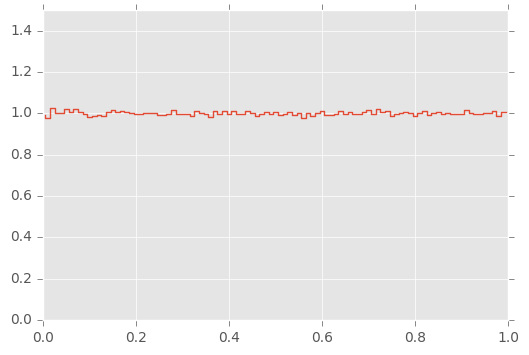

In [105]:
factor = 1.0
hist, bin_edges = np.histogram(u, bins=100, normed=True)


bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

bin_width= bin_edges[1]-bin_edges[0]



plt.step(bin_centers, factor*hist, linewidth=1)

plt.axis([0,1.,0,1.5])

In [108]:
sum(bin_centers**2*hist)*bin_width

0.33335986173968329

To make a histogram like y = x, find an inverse of $y =\int x ~dx =x^2/2$.

It is $\sqrt{2x}$, and the histogram reaches $(\sqrt{2}, \sqrt{2})$

In [8]:

factor = 1.0
hist0, bin_edges0 = np.histogram((2*u)**(1/2.0), bins=100, normed=True)

[0, 1.5, 0, 1.5]

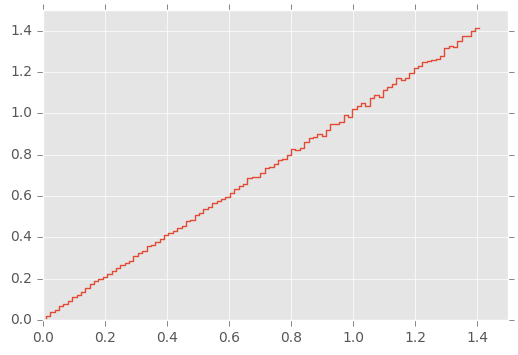

In [10]:
bin_centers0 = (bin_edges0[:-1] + bin_edges0[1:]) / 2.

bin_width0= bin_edges0[1]-bin_edges0[0]



plt.step(bin_centers0, factor*hist0, linewidth=1)

plt.axis([0,1.5,0,1.5])

Using this, it is able to integrate some function. Sometimes more effectively.

For example, $\int x^2~dx = \int x(x dx) \equiv \int x~dt$, where $dt = x dx$.

This $dt$ can be given by the above histogram.  

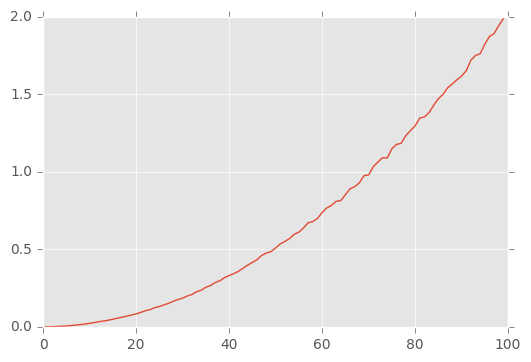

In [11]:
plt.plot(bin_centers0*hist0)

In [15]:
sum(bin_centers0*hist0)*bin_width0

0.94226418036178727

This value is a good approximation for $\int^{\sqrt{2}}_0 x^2 ~dx \sim 0.942809$.

In [16]:
sum(bin_centers0**2*hist0)*bin_width0

0.99920197964109225

This value is a good approximation for $\int^{\sqrt{2}}_0 x^2 ~dx = 1$

These two are very good approximations since $dt ~ x~dx$ have good importances for $x^2$ and $x^3$.  

In [86]:
def error(n):
    u = np.random.uniform(0, 1, n)
    factor = 1.0
    hist, bin_edges = np.histogram((2*u)**(1/2.0), bins=100, normed=True)


    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

    bin_width= bin_edges[1]-bin_edges[0]



    err = sum(bin_centers*hist)*bin_width- 0.9428090415820634
    
    return err

def plot_err(N):
    X = range(5,N,N/100)
    Y = []
    for i in range(len(X)):
        Y=Y+[error(X[i])]
    plt.plot(X,Y)
    

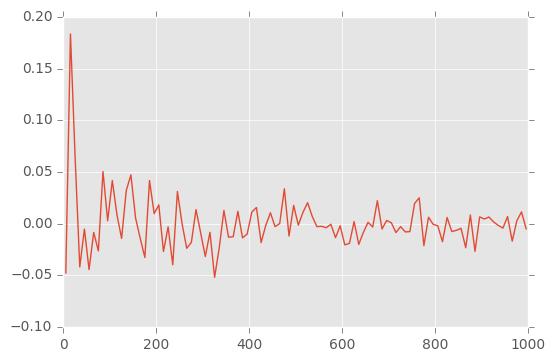

In [129]:
plot_err(1000)

In [109]:
def error0(n):
    u = np.random.uniform(0, 1, n)
    factor = 1.0
    hist, bin_edges = np.histogram(u, bins=100, normed=True)


    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

    bin_width= bin_edges[1]-bin_edges[0]



    err = sum(bin_centers**2*hist)*bin_width- 1/3.0
    
    return err

def plot_err0(N):
    X = range(5,N,N/100)
    Y = []
    for i in range(len(X)):
        Y=Y+[error0(X[i])]
    plt.plot(X,Y)
    

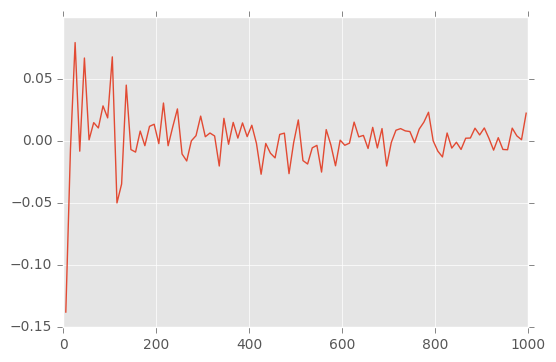

In [128]:
plot_err0(1000)

In [132]:
def plot_gap(N):
    X = range(5,N,N/1000)
    Y = []
    for i in range(len(X)):
        Y=Y+[error(X[i])-error0(X[i])]  
    plt.plot(X,Y)
    

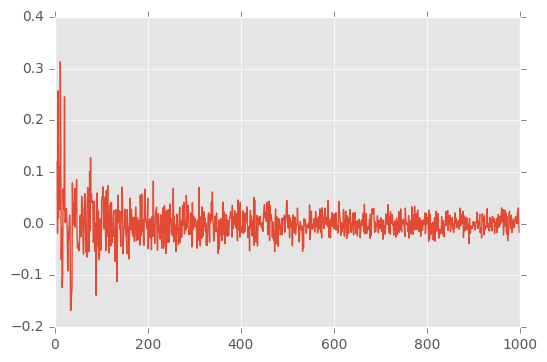

In [133]:
plot_gap(1000)